<a href="https://colab.research.google.com/github/rajgurubhosale/Resale-car-price-prediction/blob/main/Data_Cleaning_project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/used car price/car_resale_prices.csv')

In [ ]:
#copying the original dataset
df = data.copy()

In [ ]:
df.sample(2)

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
11311,11311,2016 Honda City i VTEC V,₹ 6.51 Lakh,Jan 2017,1497 cc,Comprehensive,Manual,"58,808 Kms",Second Owner,Petrol,117.3bhp,5.0,17.8 kmpl,Sedan,Bangalore
11183,11183,2013 Hyundai i20 Era 1.2,₹ 3 Lakh,2013,1197 cc,Third Party insurance,Manual,"1,20,000 Kms",First Owner,Petrol,82.85bhp,5.0,18.6 kmpl,Hatchback,Bangalore


# issues with data


*   drop duplicates
*   removing rs symbol from front
*   clean resale_price column and convert it into numerical
*   extracting year from full_name and stroing in registered year to tackle issue (registered_year has null values)
*   create a new feature by extracting brand of cars from full_name
*   clean insurance column


*   removing rows when year is too old 2000 we are not capping because it will make bias data

*  Removing cc from engine_capacity column
* cleaning owner type an removing(owener word) of every value
* handling noisy data from kms_driven coln





In [ ]:
df = df[['full_name','engine_capacity','resale_price','registered_year','insurance','transmission_type','kms_driven','owner_type','fuel_type']]

In [ ]:
#removing rs symbol from front
df['resale_price'] = df['resale_price'].str.slice(start=1)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
def currency_converter(x):
  if x.endswith('Lakh'):
    x = x.split()[0]
    if len(x) <= 2 and len(x) > 0:
      return 100000*float(x.replace('.',''))
    else:
      return 1000*float(x.replace('.',''))
  elif x.endswith('Crore'):
    x = x.split()[0]
    return 100000*float(x.replace('.',''))
  else:
    return float(x.replace(',',''))

In [ ]:
df['resale_price'] = df['resale_price'].apply(currency_converter)

In [ ]:
df[df.duplicated()].count()

full_name            0
engine_capacity      0
resale_price         0
registered_year      0
insurance            0
transmission_type    0
kms_driven           0
owner_type           0
fuel_type            0
dtype: int64

In [ ]:
#removing null values and filling with registered year in col of full name because itis same
df['registered_year'] = df['full_name'].str.split().apply(lambda x:x[0])
df['registered_year'] = df['registered_year'].astype('int16')
#it is causeing 13 duplicated value create(valid duplicated)

In [ ]:
df[df.duplicated()].count()

full_name            13
engine_capacity      13
resale_price         13
registered_year      13
insurance            13
transmission_type    13
kms_driven           13
owner_type           13
fuel_type            13
dtype: int64

In [ ]:
#extracting brand of cars from full_name
df['brand'] = df['full_name'].str.split().apply(lambda x:x[1]).str.join('')
#after removing full_name column it is causeing duplcats values(valid)

In [ ]:
names = df['full_name'].str.split().apply(lambda x: x[2:4]).str.join(' ')
names.value_counts(ascending=False)

Grand i10           687
Wagon R             679
Swift Dzire         588
Baleno 1.2          347
City i              323
                   ... 
Fabia 1.6             1
Optra 1.8             1
Ecosport SE           1
Indigo VS             1
Cayenne Platinum      1
Name: full_name, Length: 999, dtype: int64

In [ ]:
#df.drop(columns='full_name',inplace=True)

In [ ]:
#changing all third insurnce values to Third Party
df['insurance'].value_counts()
filt = df['insurance'] == 'Third Party insurance'
df.loc[filt,'insurance'] = 'Third Party'

In [ ]:
#changeing 1 to comprehensive insurance beacuse it means the same
filt = df['insurance'] == '1'
df.loc[filt,'insurance'] = 'Comprehensive'


In [ ]:
def transform_insurance(value):
  if value == 'Third Party':
    return 'Third'
  elif value == 'Zero Dep':
    return 'Zerodep'
  elif value == 'Comprehensive':
    return 'First'
  elif value =='Not Available':
    return 'Uncovered'
  elif value == '2':
    return 'Second'
  else:
    return value

In [ ]:
#clean insurance column
df['insurance'] = df['insurance'].apply(transform_insurance)

In [ ]:
all_years  = df['registered_year']

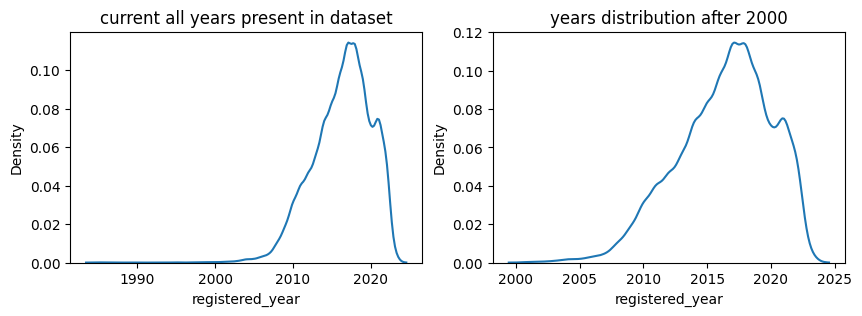

In [ ]:
#removing rows when year is too old 2000 we are not capping because it will make bias data
filt = df['registered_year'] > 2000
df = df.loc[filt]

plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.kdeplot(all_years)
plt.title('current all years present in dataset')

plt.subplot(1,2,2)
sns.kdeplot(df['registered_year'])
plt.title('years distribution after 2000')
plt.show()

In [ ]:
#removing cc
filt = df['engine_capacity'].notnull()
df.loc[filt,'engine_capacity'] = df.loc[filt,'engine_capacity'].str.split().apply(lambda x:x[0])

In [ ]:
# changing datatype
df['engine_capacity'] = df['engine_capacity'].astype('float')


In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#cleaning owner type an removing(owener word) of every value
#for ex first owner->first
filt = df['owner_type'].notnull()
df.loc[filt,'owner_type'] = df.loc[filt,'owner_type'].str.split().apply(lambda x:x[0])

In [ ]:
#handling noisy data from kms_driven coln
df['kms_driven'] = df['kms_driven'].str.replace(' Kms','')
df['kms_driven'] = df['kms_driven'].str.replace(',','')
df['kms_driven'] = df['kms_driven'].astype('float')

In [ ]:
filt = df['brand'] =='Land'
df.loc[filt,'brand'] = 'Land-Rover'

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['full_name'] = df['full_name'].str.split().apply(lambda x:x[2:4]).str.join(' ')

In [ ]:
df = df[df['resale_price']<  1_00_00_000]
df.shape

(17171, 10)

In [ ]:
filt = df['engine_capacity'] < 1
df = df.loc[~filt]

In [ ]:
df.to_csv('/content/drive/MyDrive/used car price/clean_df.csv')

In [ ]:
df

,full_name,engine_capacity,resale_price,registered_year,insurance,transmission_type,kms_driven,owner_type,fuel_type,brand
0,Baleno 1.2,1197.0,545000.0,2017,Third,Manual,40000.0,First,Petrol,Maruti
1,Hexa XTA,2179.0,1000000.0,2018,Third,Automatic,70000.0,First,Diesel,Tata
2,Swift Dzire,1197.0,450000.0,2015,Third,Manual,70000.0,Second,Petrol,Maruti
3,i10 Magna,1086.0,160000.0,2009,Third,Manual,80000.0,First,Petrol,Hyundai
4,i20 Active,1197.0,470000.0,2015,Third,Manual,70000.0,First,Petrol,Hyundai
...,...,...,...,...,...,...,...,...,...,...
17208,Amaze VX,1198.0,325000.0,2013,First,Manual,89000.0,Second,Petrol,Honda
17209,Camry 2.5,2494.0,2075000.0,2016,First,Automatic,68000.0,First,Petrol,Toyota
17210,Corolla Altis,1798.0,835000.0,2016,First,Manual,81000.0,First,Petrol,Toyota
17211,Creta 1.6,1582.0,1395000.0,2019,First,Automatic,20000.0,First,Diesel,Hyundai
